# Import necessary libraries


In [2]:

# Data manipulation and analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Train-test split and performance metrics
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-validation for model evaluation
from sklearn.model_selection import cross_val_score

# XgBoost
from xgboost import XGBRegressor, plot_importance





In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.shape
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.describe(include='O')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
df_cleaned = df.dropna(axis=0)
df_cleaned.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [9]:
print(df_cleaned.shape)
rows_removed = df.shape[0] - df_cleaned.shape[0] # total rows dropped
percentage_dropped = (rows_removed/df.shape[0])*100
print(percentage_dropped)

(6378, 20)
3.466020886938096


only 3.4% of the total rows was dropped so dropping null values in this situation works fine.

In [10]:
df_cleaned.duplicated().sum()

0

no dupliactes , the data is cleaned

# EDA

C:\Users\OMAR IBRAHIM\AppData\Local\Temp\ipykernel_6332\1319533212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='viridis')
C:\Users\OMAR IBRAHIM\AppData\Local\Temp\ipykernel_6332\1319533212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='viridis')
C:\Users\OMAR IBRAHIM\AppData\Local\Temp\ipykernel_6332\1319533212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_cleaned, palette='viridis')
C:\Users\OMAR IBRAHIM\AppData\Local\Temp\ipykernel_6332

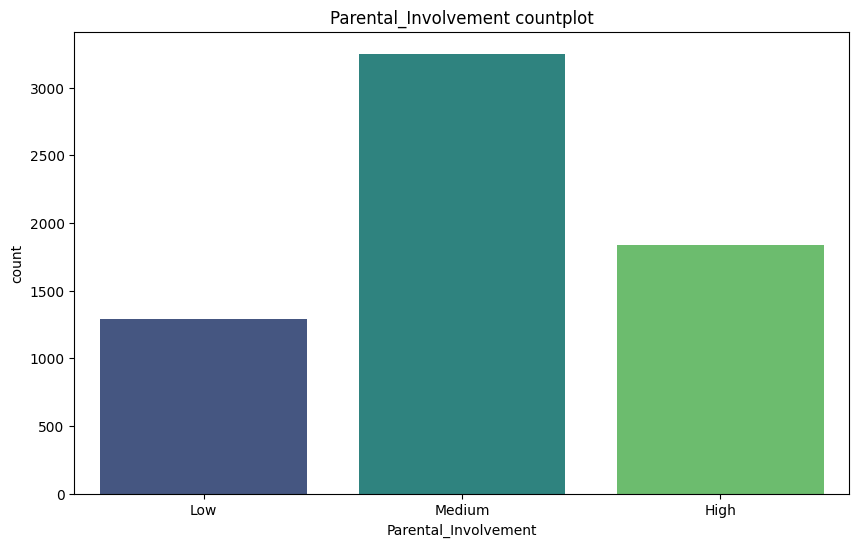

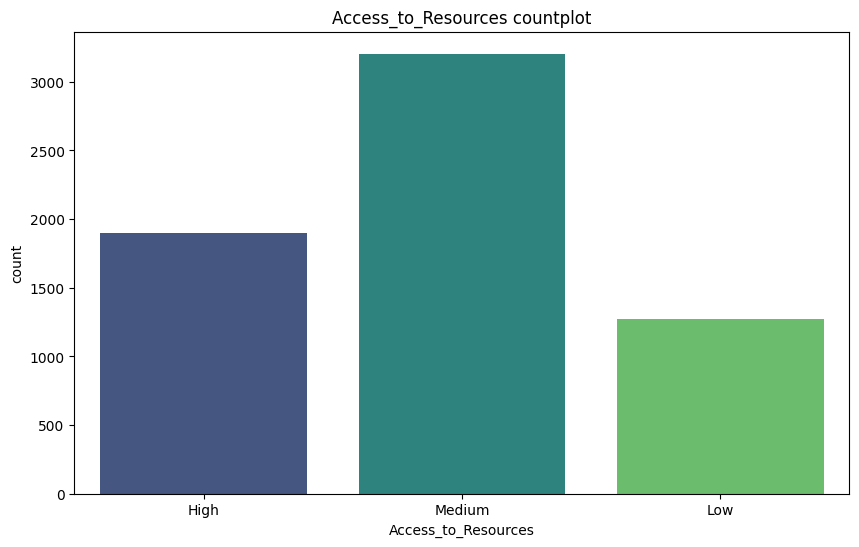

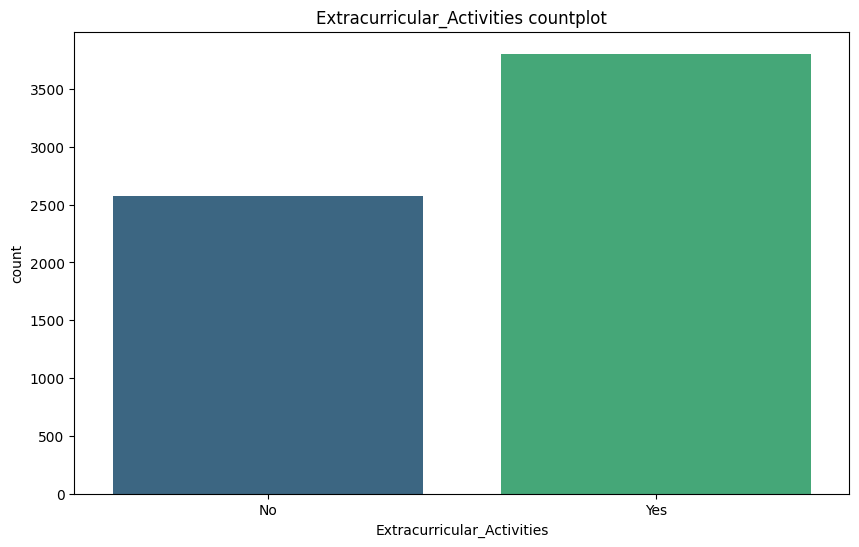

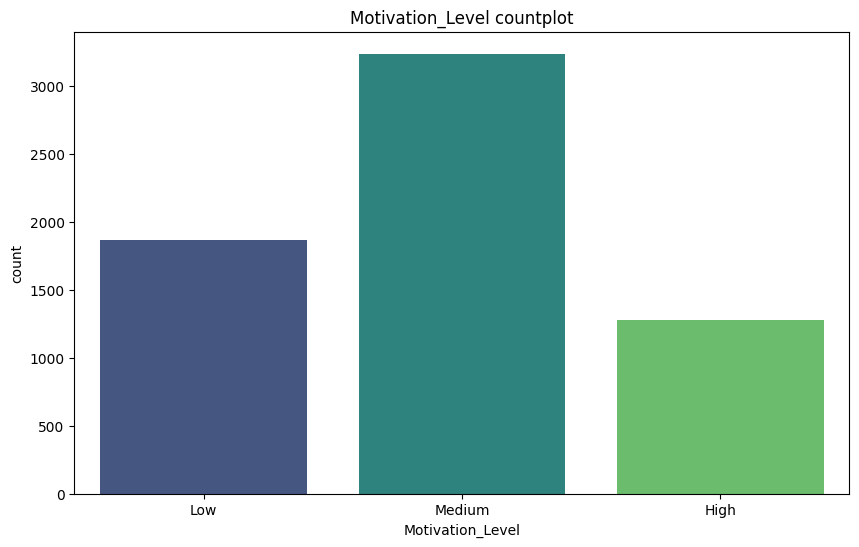

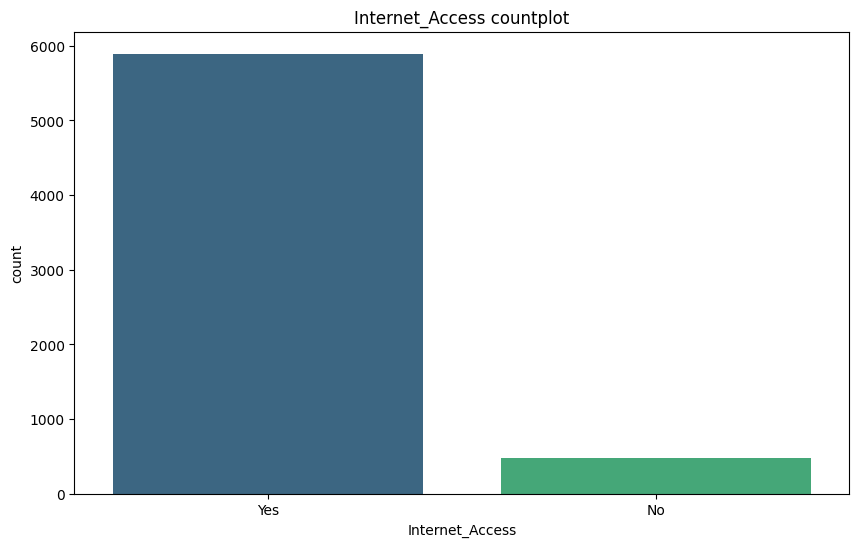

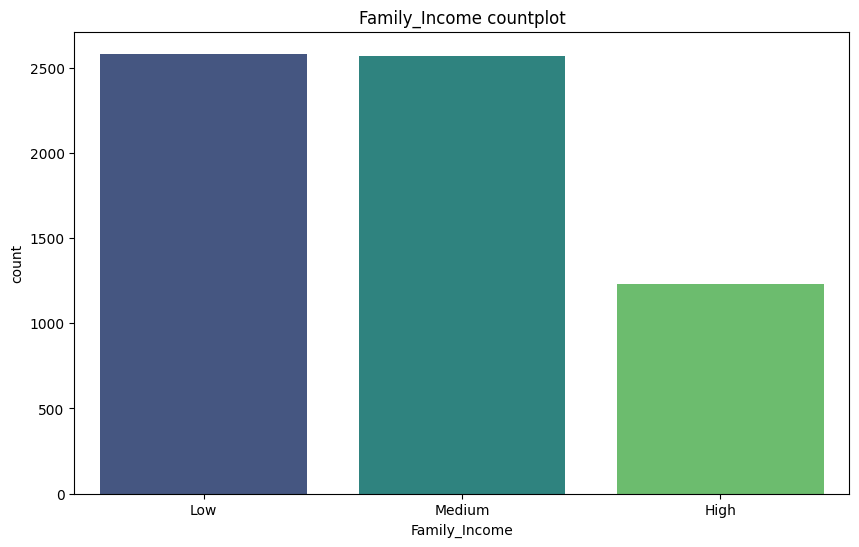

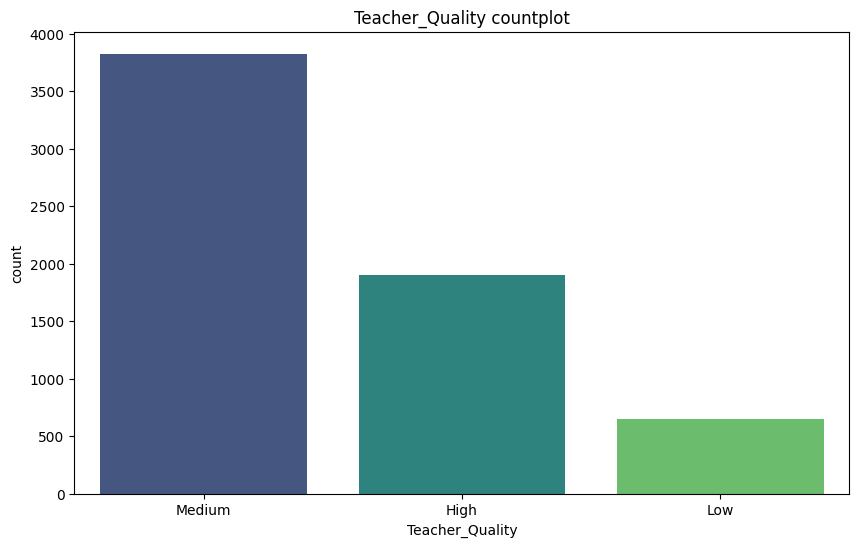

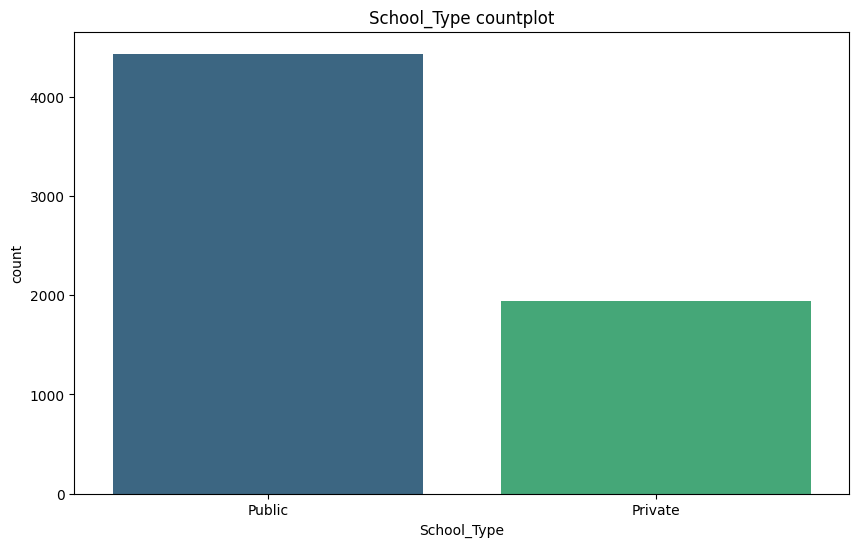

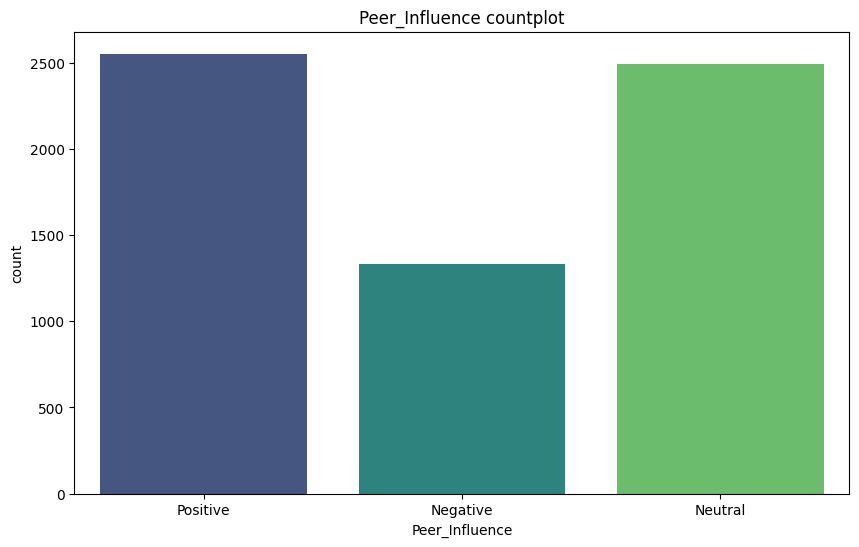

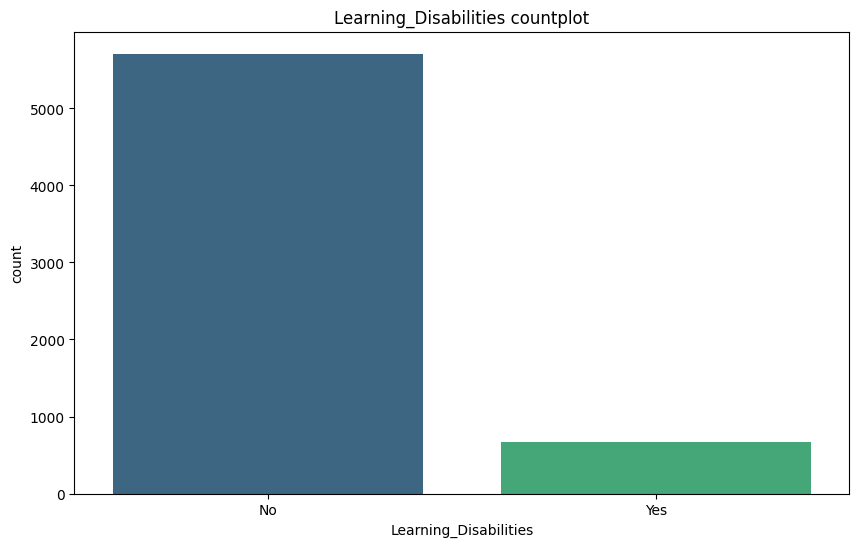

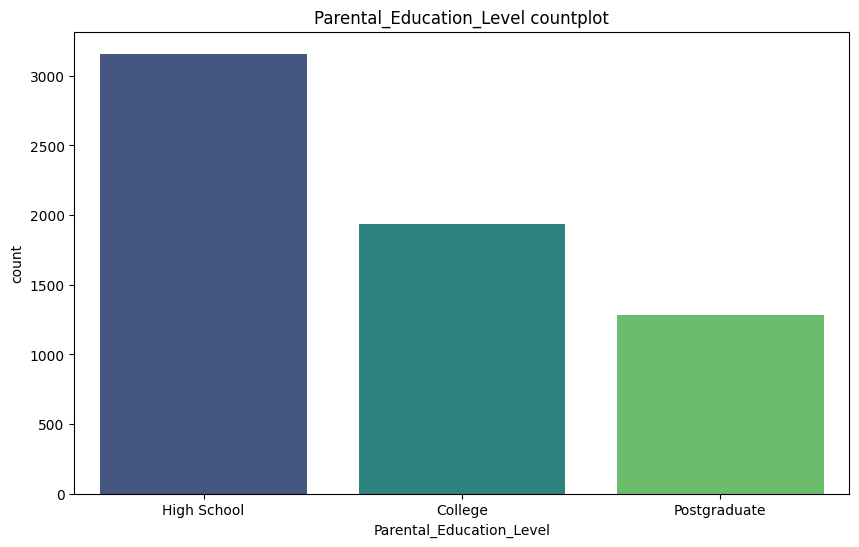

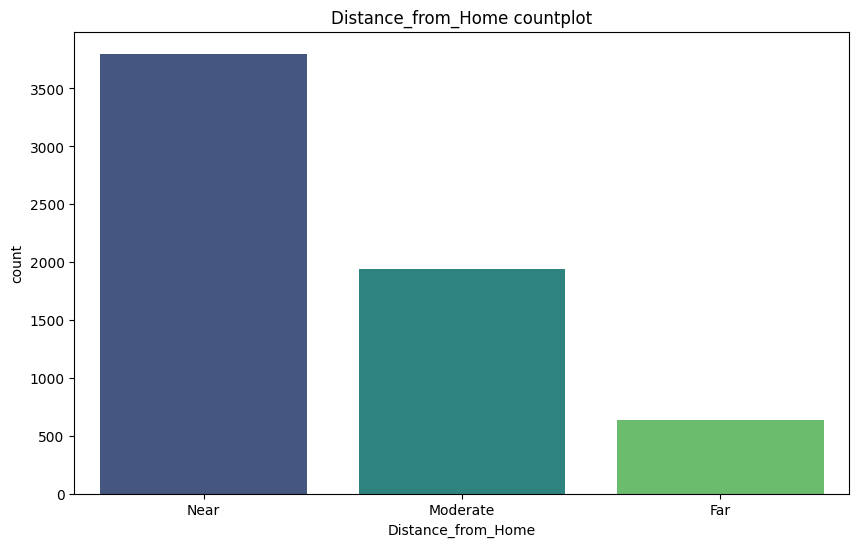

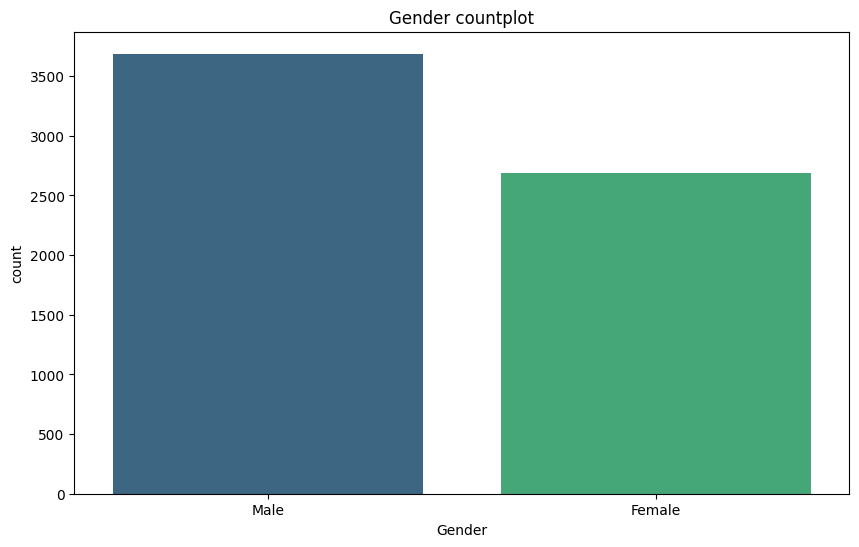

In [11]:
for col in df_cleaned.select_dtypes(include=['object']).columns:
  # bar count for each categorical column
  plt.figure(figsize=(10,6))
  sns.countplot(x=col, data=df_cleaned, palette='viridis')
  plt.title(f'{col} countplot')
  
  




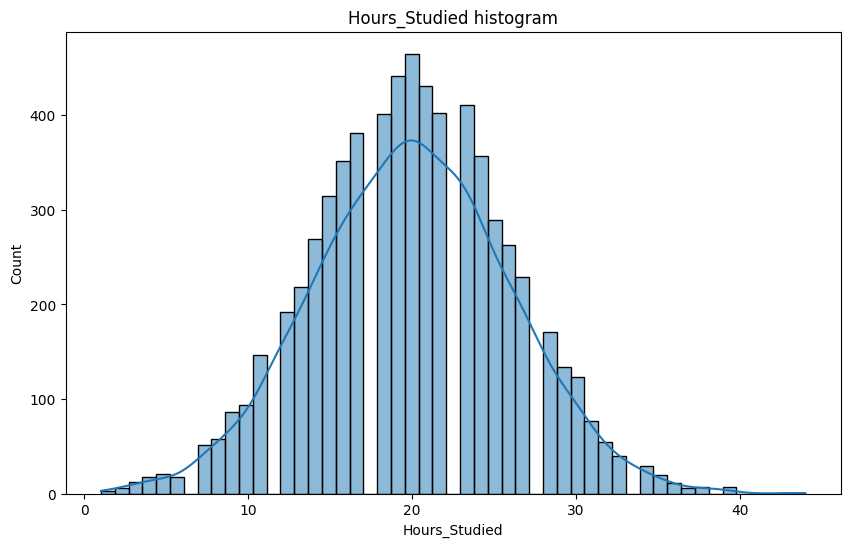

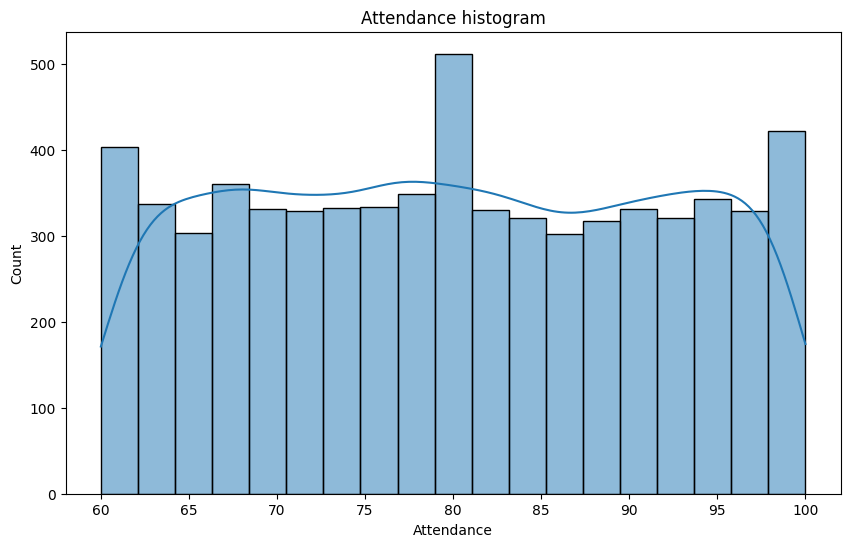

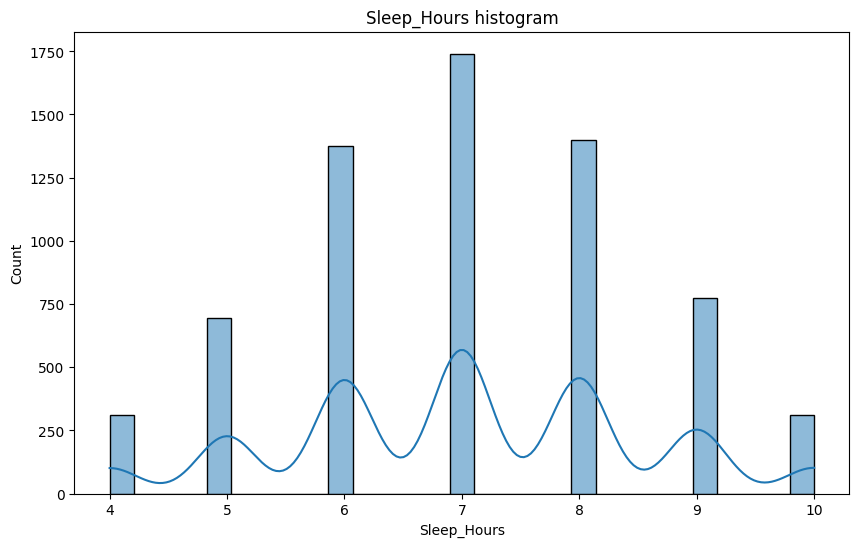

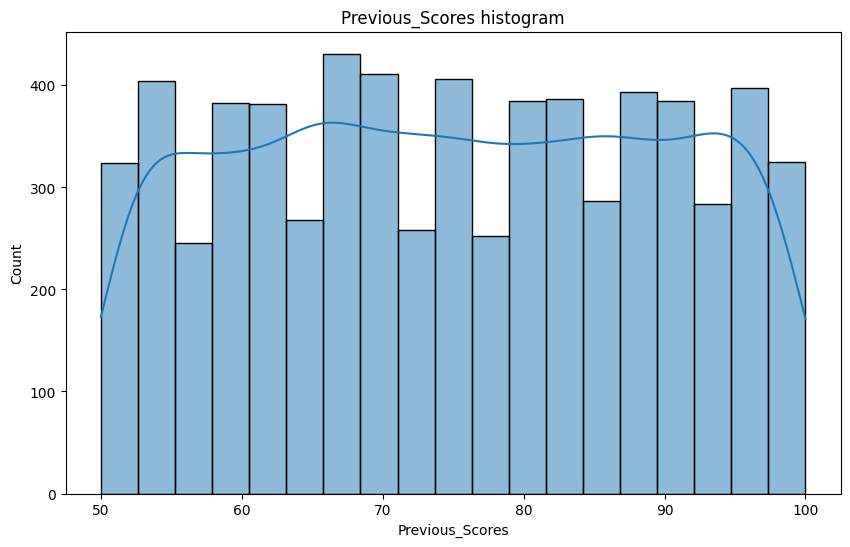

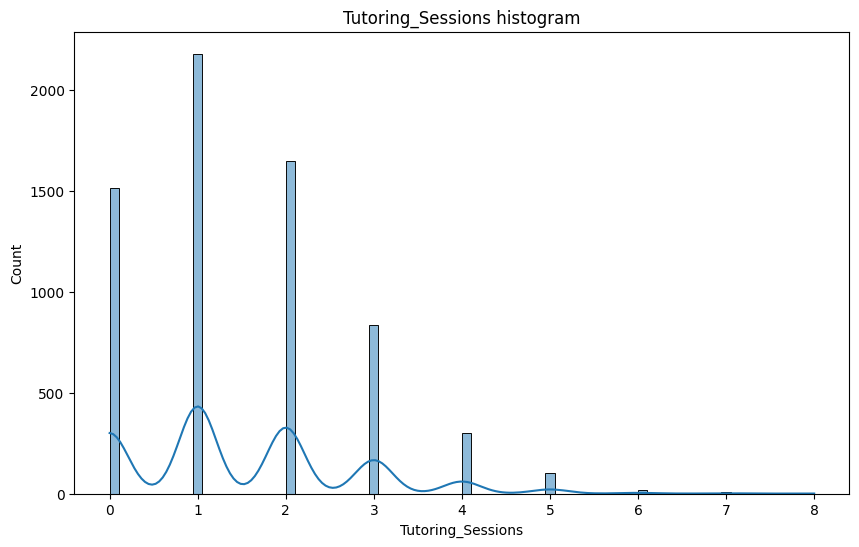

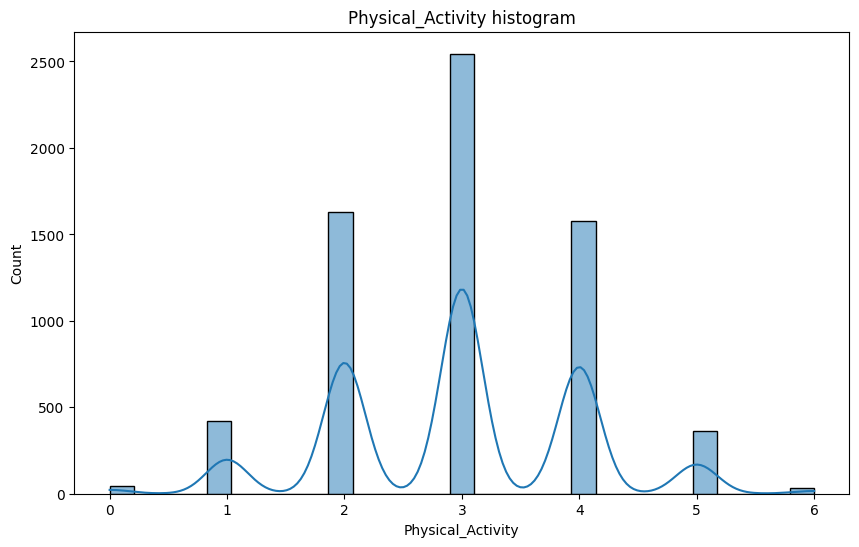

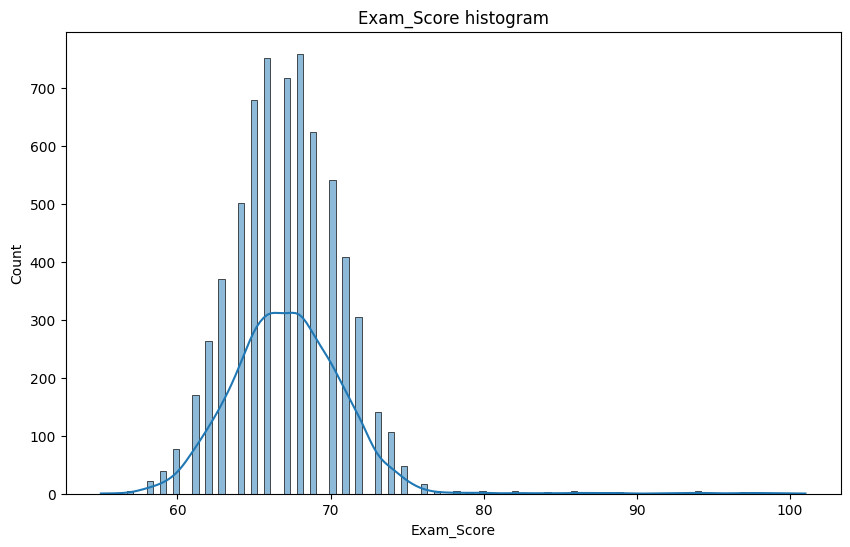

In [12]:
for col in df.select_dtypes(include=['int']).columns:
  # histogram for numerical columns
  plt.figure(figsize=(10,6))
  sns.histplot(df[col], kde=True)
  plt.title(f'{col} histogram')



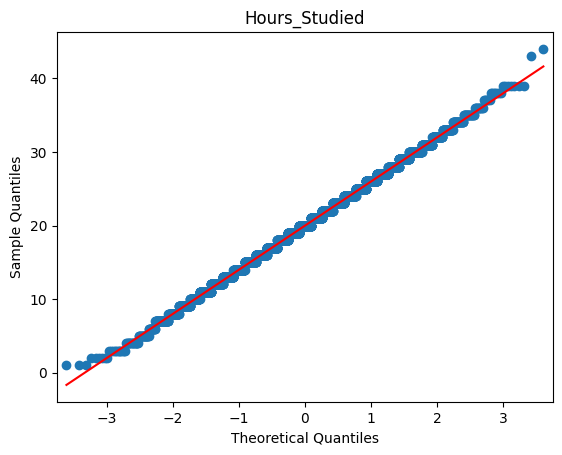

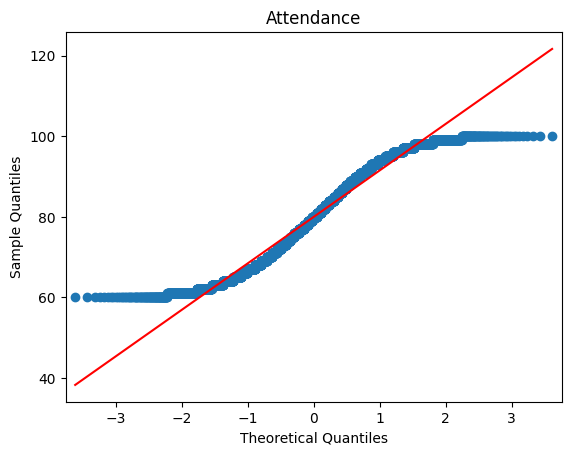

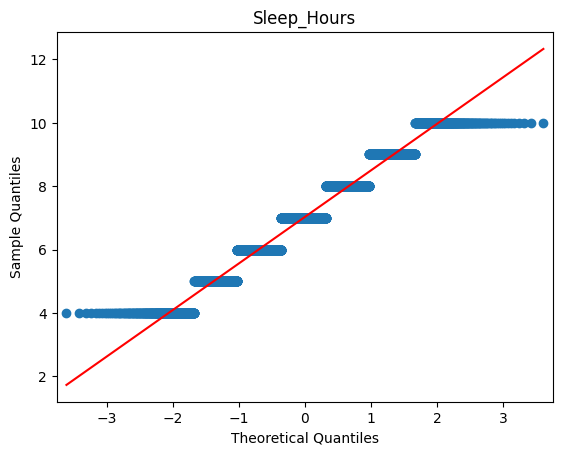

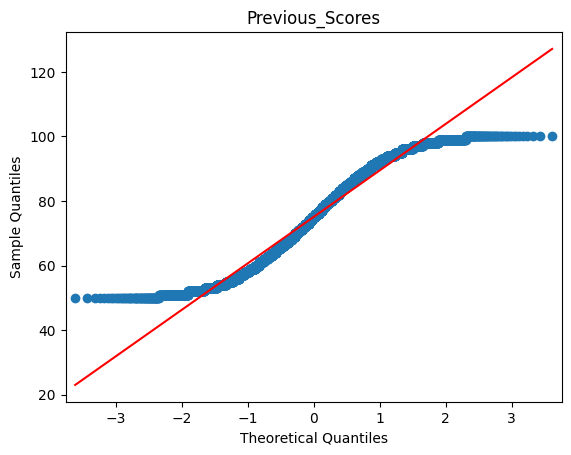

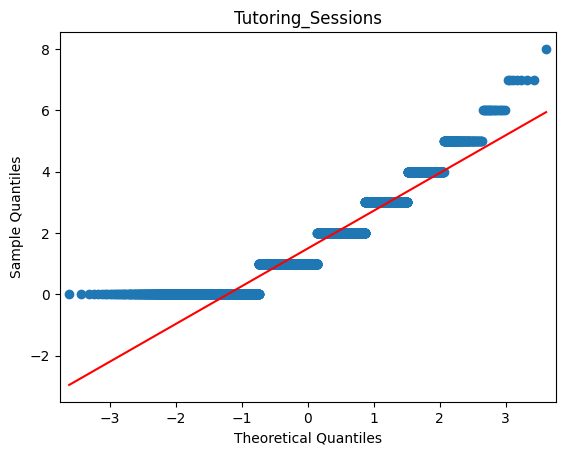

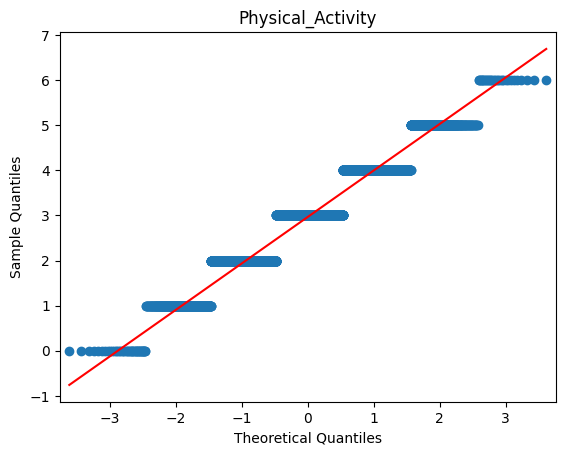

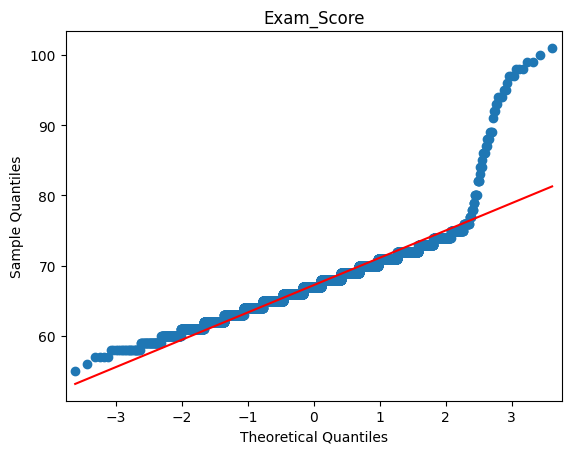

In [13]:
for col in df.select_dtypes(include=['int']).columns:
  # check for notmality of the numerical columns using statsmodels
  sm.qqplot(df[col], line='s')
  plt.title(f'{col}')

  plt.show()


  

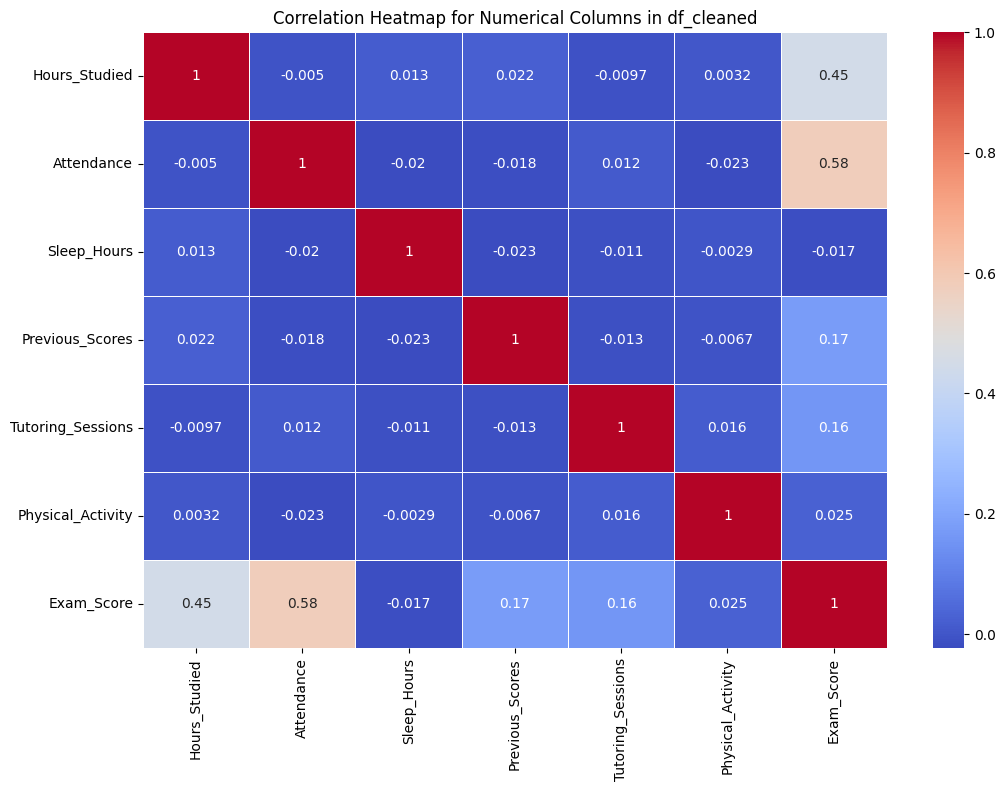

In [14]:

# Select only numerical columns 
numerical_df = df_cleaned.select_dtypes(include=['number'])

# Compute correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap for Numerical Columns in df_cleaned')
plt.show()


# Machine learning

## Random forest

In [15]:
# remove gender column as i dont want the model to be biased based on gender
df_cleaned = df_cleaned.drop(columns=['Gender'], axis=1)


In [16]:
df_cleaned.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Exam_Score'],
      dtype='object')

### Feature engineering

- Label Encode for columns like Parental_Involvement, Access_to_Resources, Motivation_Level, Family_Income, Teacher_Quality, and Peer_Influence, which have ordinal relationships.
- One-Hot Encode for columns like Extracurricular_Activities, Internet_Access, School_Type, Learning_Disabilities, Parental_Education_Level, and Distance_from_Home, which are nominal.

In [17]:


# List of columns to apply Label Encoding (ordinal)
label_encode_cols = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
                     'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Distance_from_Home']

# List of columns to apply One-Hot Encoding (nominal)
one_hot_encode_cols = ['Extracurricular_Activities', 'Internet_Access', 'School_Type',
                       'Learning_Disabilities', 'Parental_Education_Level']

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to ordinal columns
for col in label_encode_cols:
    df_cleaned[col + '_encoded'] = label_encoder.fit_transform(df_cleaned[col])

# Drop the original ordinal columns
df_cleaned = df_cleaned.drop(columns=label_encode_cols)

# Apply One-Hot Encoding to nominal columns
df_cleaned = pd.get_dummies(df_cleaned, columns=one_hot_encode_cols,dtype=int)

# Display the updated DataFrame
df_cleaned.head()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_encoded,Access_to_Resources_encoded,Motivation_Level_encoded,...,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,School_Type_Private,School_Type_Public,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate
0,23,84,7,73,0,3,67,1,0,1,...,0,0,1,0,1,1,0,0,1,0
1,19,64,8,59,2,4,61,1,2,1,...,0,0,1,0,1,1,0,1,0,0
2,24,98,7,91,2,4,74,2,2,2,...,1,0,1,0,1,1,0,0,0,1
3,29,89,8,98,1,4,71,1,2,2,...,1,0,1,0,1,1,0,0,1,0
4,19,92,6,65,3,4,70,2,2,2,...,1,0,1,0,1,1,0,1,0,0


### model building

In [18]:
X = df_cleaned.drop(columns=['Exam_Score'], axis=1)
y = df_cleaned['Exam_Score']
 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [20]:

# Define the RandomForestRegressor instance
rf = RandomForestRegressor(random_state=0)

# Get the number of features in the DataFrame
n_features = df_cleaned.shape[1]

# Define the parameter grid
cv_params = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'max_features': [2, 3, 4, n_features - 1],
    'n_estimators': [75, 100, 125, 150]
}

# Define appropriate scoring metrics for regression
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Create GridSearchCV instance
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='r2', n_jobs=-1)

# Fit the GridSearchCV to the data
rf_cv.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", rf_cv.best_params_)
print("Best R2 score found: ", rf_cv.best_score_)


Best parameters found:  {'max_depth': None, 'max_features': 24, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 125}
Best R2 score found:  0.629291355621227



### model testing & evaluation

In [21]:

# Use the best estimator from GridSearchCV
best_rf = rf_cv.best_estimator_

# Make predictions on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)



Mean Absolute Error (MAE): 1.1608326603649242
Mean Squared Error (MSE): 5.390386097076988
R-squared (R2): 0.6377760157937276


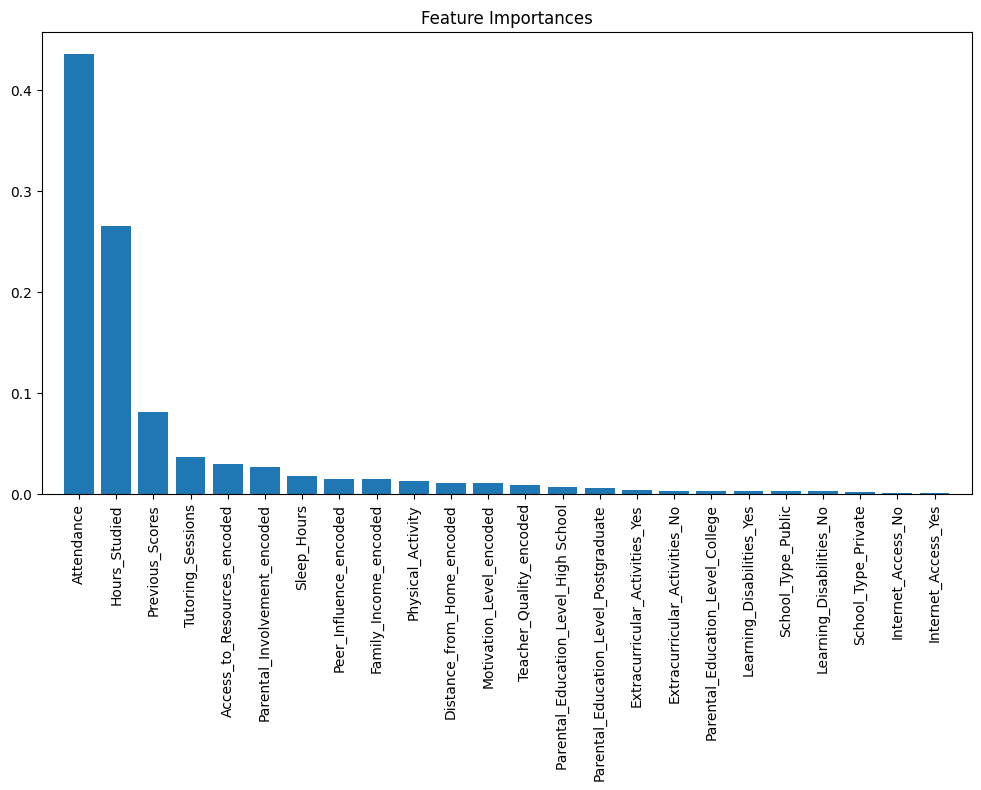

In [22]:

importances = best_rf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


## XgBoost

### model building

In [23]:
gb_regressor = XGBRegressor(objective='reg:squarederror', random_state=0)
# Parameter grid for cross-validation
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Scoring metrics
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

# Create GridSearchCV instance
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring=scoring, refit='r2', cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best R2 score found: ", grid_search.best_score_)

Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best R2 score found:  0.7030116121487233


### model testing & evaluation

In [24]:
xgboost_best  = grid_search.best_estimator_
y_xg_predict = xgboost_best.predict(X_test)
# Evaluate the model
mae_xg = mean_absolute_error(y_test, y_xg_predict)
mse_xg = mean_squared_error(y_test, y_xg_predict)
r2_xg = r2_score(y_test, y_xg_predict)

print("Mean Absolute Error (MAE):", mae_xg)
print("Mean Squared Error (MSE):", mse_xg)
print("R-squared (R2):", r2_xg)

Mean Absolute Error (MAE): 0.6965887829054112
Mean Squared Error (MSE): 4.4728647209992864
R-squared (R2): 0.6994317566723831


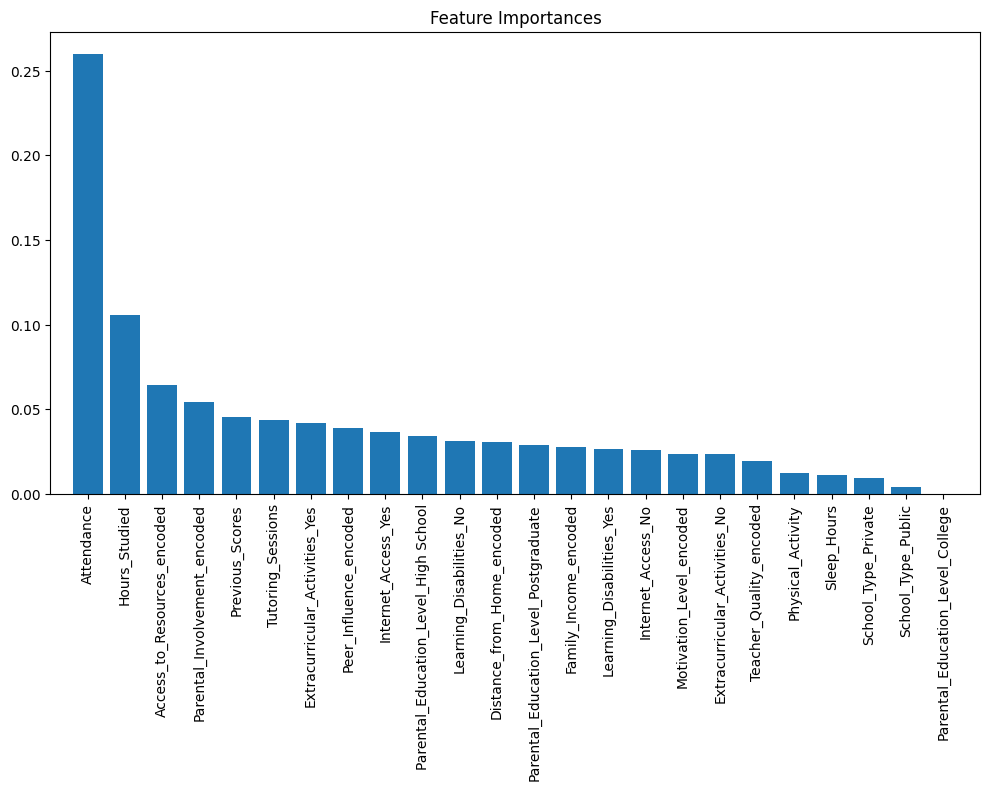

In [25]:

importances_xg = xgboost_best.feature_importances_
feature_names_xg = X.columns
indices_xg = importances_xg.argsort()[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances_xg[indices_xg], align='center')
plt.xticks(range(X.shape[1]), feature_names_xg[indices_xg], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## comaprison

In [27]:
model_df  = pd.DataFrame({
  'model name':['random forest', 'XGB'],
  'MAE':[ mae,mae_xg],
  'MSE':[mse,mse_xg],
  'R2':[r2, r2_xg]
})
model_df

,model name,MAE,MSE,R2
0,random forest,1.160833,5.390386,0.637776
1,XGB,0.696589,4.472865,0.699432
